# **Transjakarta - Public Transportation**

# Latar Belakang

Transjakarta merupakan transportasi publik yang cukup penting bagi masyarakat Jakarta. Transportasi publik ini membantu masyarakat Jakarta dalam berkegiatan sehari-hari. Karena pentingnya itu, demi kelancaran dan efisiensi dalam melayani kebutuhan masyarakat Jakarta, maka perlunya analisis kemampuan dan kapasitas dari transjakarta itu sendiri. Agar transjakarta dapat terus memberikan pelayanan terbaik bagi masyarakat Jakarta, transjakarta akan melakukan analisis data untuk mengevaluasi pelayanan dan kapasitas dari transjakarta agar masyarakat Jakarta tetap nyaman dalam beraktivitas menggunakan transjakarta dan transjakarta dalam pelaksanaan operasional berjalan secara efisien.

## Pernyataan Masalah
Perusahaan transportasi publik transjakarta ingin mengetahui **Lokasi dan waktu sibuk transjakarta yang mengalami kepadatan pengguna dalam melayani kebutuhan angkutan bagi masyarakat Jakarta**. Informasi ini akan membantu perusahaan untuk meningkatkan efektifitas transjakarta dalam melayani kebutuhan angkutan masyarakat jakarta dan mengurangi biaya operasional pada koridor yang memiliki jumlah pengguna paling sedikit.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

- **Analisis demografi dari pengguna transjakarta untuk meningkatkan pelayanan berdasarkan karakteristik dari kebanyakan pengguna transjakarta.**

- **Waktu-waktu sibuk bus transjakarta yang beroperasi, terjadi kapan saja dan bagaimana solusi mengatasi permasalahan kepadatan penumpang pada saat waktu sibuk tersebut?**

- **Koridor yang memiliki pengguna paling banyak, dan bagaimana solusi mengatasi kepadatan penumpang pada koridor tersebut?**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import json
import warnings 
warnings.filterwarnings('ignore')

# Data Understanding and Cleaning
Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi transportasi publik transjakarta.
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*.

## Data Understanding

Berikut merupakan 5 baris teratas dan terbawah dari data transaksi transjakarta.

In [2]:
transjakarta = pd.read_csv('Transjakarta.csv')
display(transjakarta.head(), transjakarta.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Dataset ini berisi informasi mengenai data transaksi meliputi data diri dari pengguna, waktu transaksi dan lokasi keberangkatan dan pemberhentian dari masing-masing pengguna transjakarta.

- Informasi data diri
    - transID : Kolom berisi ID dari setiap transaksi yang diproses
    - payCardID : Kolom berisi nomor ID dari setiap pengguna 
    - payCardBank : Kolom berisi kartu pembayaran yang digunakan untuk bertransaksi
    - payCardName : Kolom berisi nama pengguna yang bertransaksi
    - payCardSex : Kolom berisi keterangan gender dari pengguna
    - payCardBirthDate : Kolom berisi keterangan tahun lahir dari pengguna
- Keterangan Koridor
    - corridorID : Kolom berisi nomor ID dari koridor yang digunakan 
    - corridorName : Kolom berisi nama dari koridor yang digunakan
    - direction : Kolom berisi keterangan arah dari koridor yang digunakan yang dideskripsikan dengan angka 1 dan 0
- Keterangan Keberangkatan
    - tapInStops : Kolom berisi ID dari lokasi halte keberangkatan
    - tapInStopsName : Kolom berisi nama dari lokasi halte keberangkatan
    - tapInStopsLat : Kolom berisi lattitude dari lokasi halte keberangkatan
    - tapInStopsLon : Kolom berisi longtitude dari lokasi halte keberangkatan
    - stopStartSeq : Kolom berisi nomor urut halte keberangkatan dalam suatu koridor
    - tapInTime : Kolom berisi keterangan waktu transaksi saat keberangkatan
- Keterangan Pemberhentian
    - tapOutStops : Kolom berisi ID dari lokasi halte pemberhentian
    - tapOutStopsName : Kolom berisi nama dari lokasi halte pemberhentian
    - tapOutStopsLat : Kolom berisi lattitude dari lokasi halte pemberhentian
    - tapOutStopsLon : Kolom berisi longtitude dari lokasi halte pemberhentian
    - stopEndSeq : Kolom berisi nomor urut halte pemberhentian dalam suatu koridor
    - tapOutTime : Kolom berisi keterangan waktu transaksi saat pemberhentian
- payAmount : Kolom berisi jumlah pembayaran yang dilakukan saat transaksi

In [3]:
print(f'Jumlah baris dan kolom di dataset transjakarta adalah {transjakarta.shape}')
transjakarta.info()

Jumlah baris dan kolom di dataset transjakarta adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       356

In [4]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': transjakarta.columns.values,
    'data_type': transjakarta.dtypes.values,
    'null': transjakarta.isna().mean().values * 100,
    'negative': [True if transjakarta[col].dtype == int and (transjakarta[col] < 0).any() else False for col in transjakarta.columns],
    'n_unique': transjakarta.nunique().values,
    'sample_unique': [transjakarta[col].unique() for col in transjakarta.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,transID,object,0.000000,False,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,int64,0.000000,False,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,object,0.000000,False,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,object,0.000000,False,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,object,0.000000,False,2,"[M, F]"
5,payCardBirthDate,int64,0.000000,False,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,object,3.316623,False,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,object,5.092348,False,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,float64,0.000000,False,2,"[1.0, 0.0]"
9,tapInStops,object,3.200528,False,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Secara umum, kita dapat melihat bahwa :
- Data transjakarta memiliki 37900 baris dan 22 kolom
- Beberapa kolom, yaitu, corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime dan payAmount memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data nan.
- Tipe kolom tapInTime dan tapOutTime masih berupa object dan belum datetime.

## Data Cleaning

### Data Duplikat

In [5]:
# Mengecek data duplikat
transjakarta.duplicated().sum()

0

Setelah dilakukan pengecekan terhadap data duplikat, selanjutnya akan dilakukan pengecekan terhadap missing value pada data transjakarta.

### Missing Value

In [6]:
# Mengecek jumlah baris yang missing value pada setiap kolom
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

<Axes: >

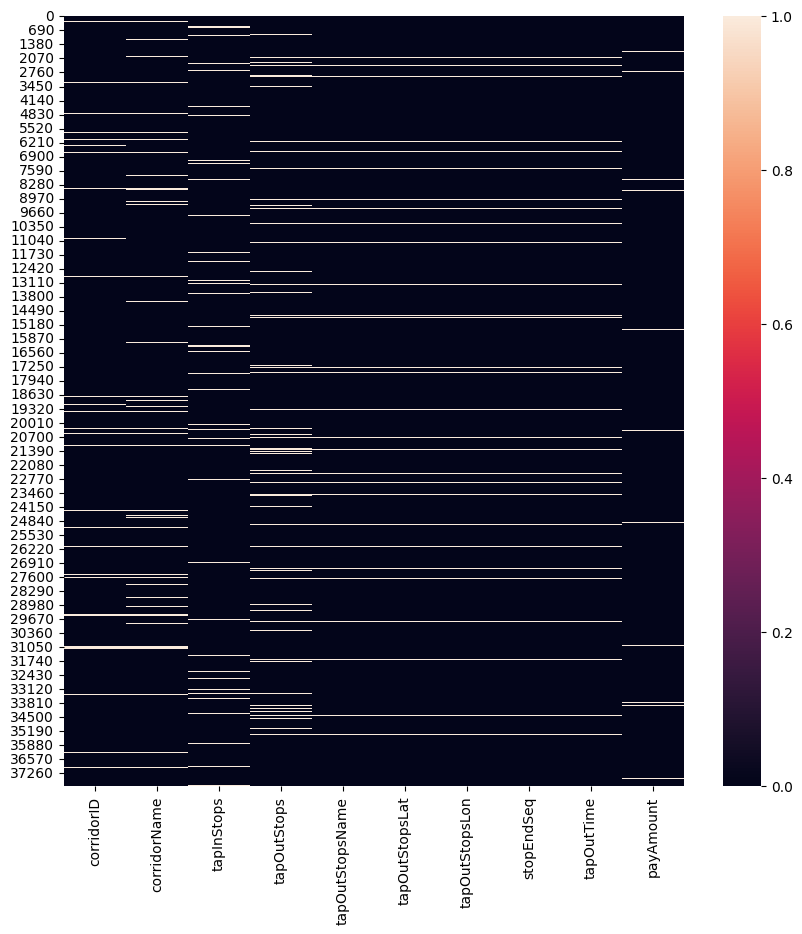

In [7]:
# Mengecek sebaran missing value didalam data
plt.figure(figsize=(10,10))
sns.heatmap(transjakarta[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Dari pengecekan data dan grafik heatmap di atas dapat dilihat bahwa terdapat missing value pada beberapa kolom, kolom-kolom tersebut terdapat beberapa yang memiliki keterkaitan, diantaranya:

- Ditemukan adanya keterkaitan antara kolom-kolom tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime.
- Ditemukan juga adanya keterkaitan antara kolom corridorID dan corridorName.
- Ditemukan juga keterkaitan antara tapOutStops dan tapOutStopsName. 
- Dan ditemukan juga keterkaitan antara tapInStops dan tapInStopsName. 

#### `tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq` dan`tapOutTime`

Dikarenakan cukup banyak data yang kosong pada baris yang terkait dengan tapOutTime dan dikarenakan cukup sulit untuk mengisi missing value pada kolom tapOutTime, maka baris yang terdapat missing value pada kolom-kolom tersebut akan dihapus.

In [8]:
# Handling missing value pada kolom tapOutTime
transjakarta_copy = transjakarta.copy()
transjakarta.dropna(subset=['tapOutTime'], inplace=True)

<Axes: >

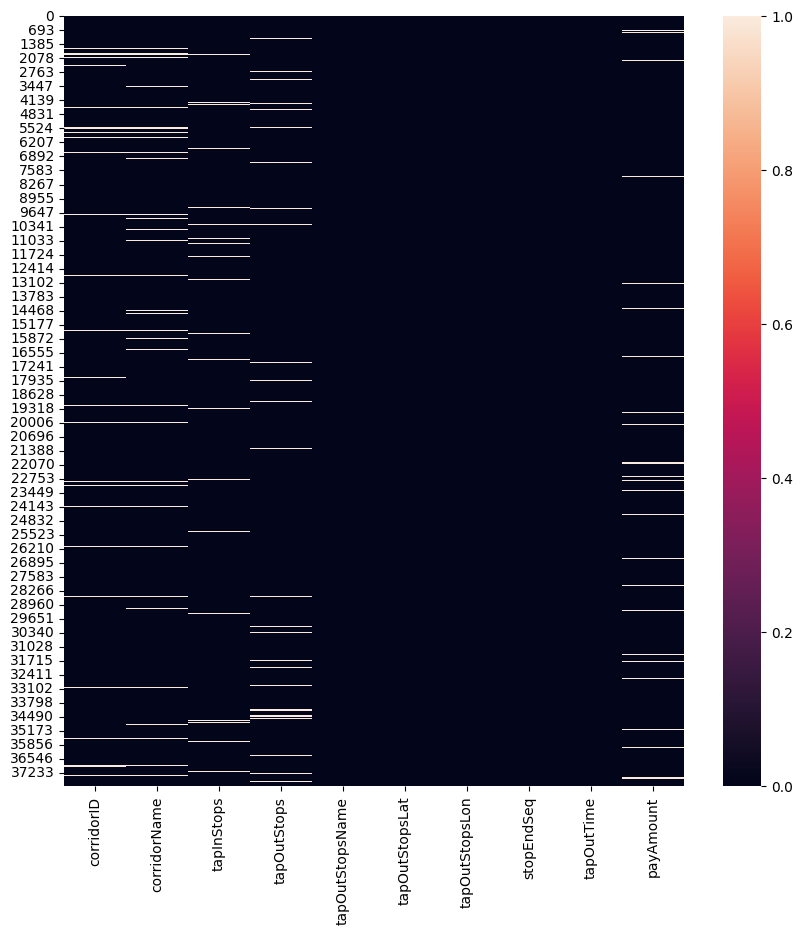

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(transjakarta[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

In [10]:
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1205
corridorName        1854
direction              0
tapInStops          1177
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          945
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            968
dtype: int64

Setelah dicek kembali, missing value pada kolom-kolom di atas sudah tidak ada.
Kemudian kita akan kembali mengecek kolom-kolom lain yang masih memiliki missing value.

<Axes: >

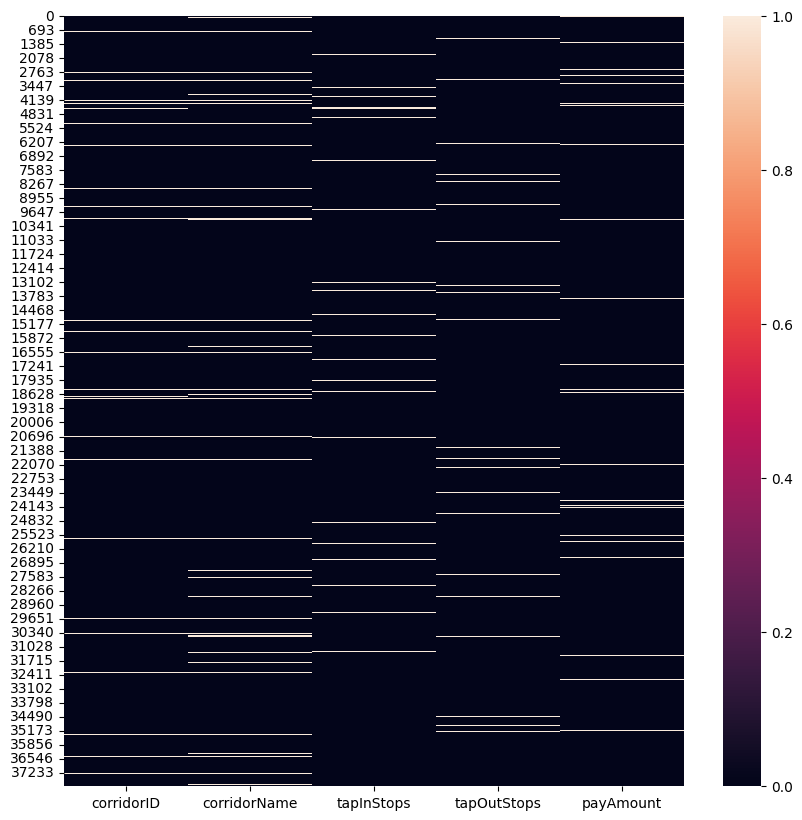

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(transjakarta[['corridorID','corridorName','tapInStops','tapOutStops','payAmount']].isna())

#### `payAmount`

Pada kolom payAmount, nilai unik dari nilai pada kolom tersebut hanya 3. Maka missing value pada kolom payAmount akan diisi dengan nilai median dari kolom tersebut.

In [12]:
median_values = transjakarta['payAmount'].median()
transjakarta['payAmount'] = transjakarta['payAmount'].fillna(value=median_values)

In [13]:
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1205
corridorName        1854
direction              0
tapInStops          1177
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          945
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
dtype: int64

#### `tapInStops` dan `tapInStopsName`

Pada kolom tapInStops data memiliki hubungan dengan tapInStopsName, karena tapInStops merupakan nomor id dan tapInStopsName merupakan keterangan namanya. Maka kita dapat mengisi nilai yang kosong dengan nilai yang memiliki keterangan tapInStopsName-nya sama. Untuk mengisinya kita akan melakukan groupby berdasarkan tapInStopsName untuk mengelompokkan data yang memiliki tapInStopsName yang sama, kemudian kita akan mengisinya dengan metode .ffill() dan pada baris yang teratas maka akan diisi dengan metode .bfill().

In [14]:
transjakarta['tapInStops'] = transjakarta.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(method='ffill'))

In [15]:
transjakarta['tapInStops'] = transjakarta.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(method='bfill'))

In [16]:
# Mengecek data tapOutStops yang masih missing value
transjakarta[transjakarta['tapInStops'].isna()==True][['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
32365,NaN,Bundaran Alam Sutera 1
32533,NaN,Graha Sindu Bpk Penabur
32572,NaN,Rusun Rorotan 2
32663,NaN,Jln. Pinang 1
32768,NaN,Fatmawati 1
32821,NaN,Nifarro Park
32852,NaN,Ponpes Baitul Quran Al Ikhwan 1
32861,NaN,Sbr. Jln. R. Anggun
33093,NaN,Sbr. Jln. Rawabadung
33296,NaN,Term. Muara Angke 2


In [17]:
# Mengecek apakah terdapat data lain yang tapInStopsName-nya Bundaran Alam Sutera 1
transjakarta[transjakarta['tapInStopsName']=='Bundaran Alam Sutera 1'][['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
32365,NaN,Bundaran Alam Sutera 1


#### `tapOutStops` dan `tapOutStopsName`

Sama halnya dengan kolom tapInStops dan tapInStopsName, kolom tapOutStops juga memiliki hubungan dengan tapOutStopsName, maka handling missing value yang akan dilakukan juga sama, yaitu dengan melakukan groupby berdasarkan tapOutStopsName untuk mengelompokkan data yang memiliki tapOutStopsName yang sama, kemudian kita akan mengisinya dengan metode .ffill() dan pada baris yang teratas maka akan diisi dengan metode .bfill().

In [18]:
transjakarta['tapOutStops'] = transjakarta.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(method='ffill'))

In [19]:
transjakarta['tapOutStops'] = transjakarta.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(method='bfill'))

In [20]:
# Mengecek data tapOutStops yang masih missing value
transjakarta[transjakarta['tapOutStops'].isna()==True][['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
32068,NaN,Jln. H. Yahya
32419,NaN,Sbr. Jl H Emuntipala I
32570,NaN,Sbr. Ps. Pisang
32926,NaN,Exit Tol Veteran Bintaro
32960,NaN,MIN 8 Srengseng Sawah
33424,NaN,Masjid Al Waqof
33550,NaN,Sbr. Persada Purnawira Halim
33961,NaN,Grha Intirub
34084,NaN,Jln. Timbul III
34120,NaN,SMAN 28


In [21]:
# Mengecek apakah terdapat data lain yang tapOutStopsName-nya Jln. H. Yahya
transjakarta[transjakarta['tapOutStopsName']=='Jln. H. Yahya'][['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
32068,NaN,Jln. H. Yahya


Setelah dicek kembali, pada kolom tapInStops, tapInStopsName dan tapOutStops dan tapOutStopsName ternyata masih ada beberapa nilai yang kosong, hal ini terjadi karena baris-baris tersebut tidak memiliki kumpulan data yang sama. Artinya pengguna transjakarta hanya satu kali bepergian menggunakan transjakarta pada halte tersebut.

#### `corridorID` dan `corridorName`

Pada kolom corridorID dan corridorName, kolom-kolom tersebut juga memiliki hubungan, namun pada kasus ini kita akan mengisi missing value berdasarkan payCardName, dikarenakan yang terlihat pada data transjakarta, dapat diketahui bahwa pengguna transjakarta hanya menggunakan corridor yang sama disetiap transaksinya, hal itu dikarenakan pengguna transjakarta setiap harinya bepergian ke tempat yang sama, yaitu ke tempat bekerja, maka kita dapat melakukan groupby berdasarkan nama pengguna.

In [22]:
# Mengecek salah satu pengguna transjakarta yang bepergian menggunakan corridor Matraman Baru - Ancol
display(transjakarta[transjakarta['payCardName']=='Bajragin Usada'].head(3), transjakarta[transjakarta['payCardName']=='Bajragin Usada'].tail(3))

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
300,FGIY576J9K96QI,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,0.0,P00021,...,106.83906,9,2023-04-03 17:53:29,P00140,Pademangan,-6.133704,106.83164,13.0,2023-04-03 19:19:53,3500.0
600,WITQ658C2H21XF,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-04 05:20:48,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-04 06:05:11,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11100,PBBN844L8J57RB,180062659848800,emoney,Bajragin Usada,M,2008,NaN,Matraman Baru - Ancol,0.0,P00021,...,106.83906,9,2023-04-27 16:21:42,P00140,Pademangan,-6.133704,106.83164,13.0,2023-04-27 17:28:27,3500.0
11400,LFPK256X4I31CF,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-28 05:54:30,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-28 06:39:59,3500.0
11700,OAWD767P7C23YL,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,0.0,P00021,...,106.83906,9,2023-04-28 16:37:27,P00140,Pademangan,-6.133704,106.83164,13.0,2023-04-28 18:00:55,3500.0


In [23]:
transjakarta['corridorName'] = transjakarta.groupby('payCardName')['corridorName'].transform(lambda x: x.fillna(method='bfill'))

In [24]:
transjakarta[transjakarta['corridorName'].isna()==True][['payCardName','corridorName']].head(60)

,payCardName,corridorName
11423,Darman Purwanti,NaN
11509,"Dina Zulkarnain, M.M.",NaN
11542,"Galak Budiman, S.Pt",NaN
11649,R. Unggul Halimah,NaN
11720,Aslijan Irawan,NaN
11743,Aurora Hasanah,NaN
11746,Cager Setiawan,NaN
11751,"dr. Belinda Handayani, S.E.",NaN
11809,"Dina Zulkarnain, M.M.",NaN
11813,Narji Waskita,NaN


In [25]:
transjakarta['corridorID'] = transjakarta.groupby('payCardName')['corridorID'].transform(lambda x: x.fillna(method='bfill'))

In [26]:
transjakarta[transjakarta['corridorID'].isna()==True][['payCardName','corridorID']].head(60)

,payCardName,corridorID
11509,"Dina Zulkarnain, M.M.",NaN
11542,"Galak Budiman, S.Pt",NaN
11649,R. Unggul Halimah,NaN
11720,Aslijan Irawan,NaN
11751,"dr. Belinda Handayani, S.E.",NaN
11809,"Dina Zulkarnain, M.M.",NaN
11813,Narji Waskita,NaN
11836,Luhung Hutapea,NaN
11841,"Tgk. Joko Maryadi, M.Ak",NaN
11842,"Galak Budiman, S.Pt",NaN


<Axes: >

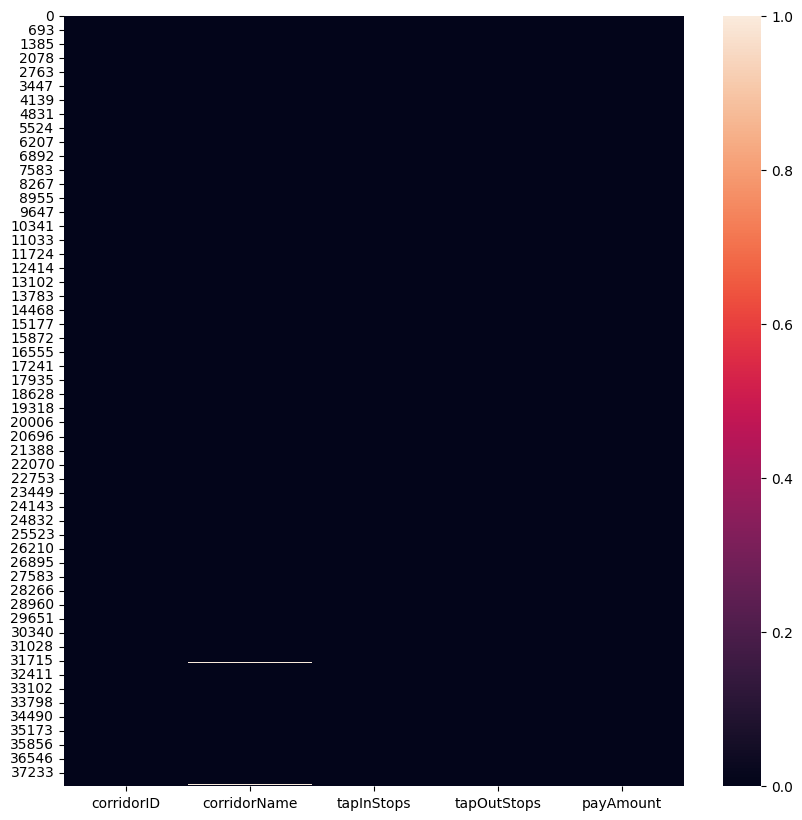

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(transjakarta[['corridorID','corridorName','tapInStops','tapOutStops','payAmount']].isna())

Setelah handling value corridorID dan corridorName berdasarkan payCardName, masih terdapat missing value pada corridorName, dikarenakan corridorID sudah cukup banyak yang terisi, maka corridorName akan diisi berdasarkan corridorID.

In [28]:
transjakarta['corridorName'] = transjakarta.groupby('corridorID')['corridorName'].transform(lambda x: x.fillna(method='ffill'))

In [29]:
display(transjakarta.isna().sum(), round(transjakarta.isna().sum()/len(transjakarta)*100,2))

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID          69
corridorName        69
direction            0
tapInStops          32
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops         19
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
dtype: int64

transID             0.00
payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          0.19
corridorName        0.19
direction           0.00
tapInStops          0.09
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
stopStartSeq        0.00
tapInTime           0.00
tapOutStops         0.05
tapOutStopsName     0.00
tapOutStopsLat      0.00
tapOutStopsLon      0.00
stopEndSeq          0.00
tapOutTime          0.00
payAmount           0.00
dtype: float64

Setelah dicek kembali missing value pada data transjakarta, masih terdapat data transaksi pengguna yang hanya bertransaksi 1 kali. Dikarenakan sulitnya menebak jalur koridor yang digunakan dan dikarenakan tidak signifikannya jumlah missing value terhadap keseluruhan data, maka data missing value yang tersisa akan dihapus.

In [30]:
transjakarta = transjakarta.dropna()

In [31]:
transjakarta.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis. Terlebih dahulu kita akan mengecek deskriptif statistik dari data transjakarta.

In [32]:
display(transjakarta.describe(), transjakarta.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.643700e+04,36437.000000,36437.000000,36437.000000,36437.000000,36437.000000,36437.000000,36437.000000,36437.000000,36437.000000
mean,4.234153e+17,1990.128743,0.500206,-6.214866,106.841525,13.558004,-6.214662,106.841227,21.205341,2728.407937
std,1.319457e+18,13.037383,0.500007,0.057857,0.060337,12.224456,0.059013,0.060967,13.792759,4168.373575
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800407e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.693230e+15,2001.000000,1.000000,-6.175579,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,36437,36437,36437,36437,36437,36437,36437,36437,36437,36437,36437,36437
unique,36437,6,1968,2,221,216,2516,2515,35686,2203,2202,35791
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-28 08:33:06,P00016,BKN,2023-04-19 19:13:02
freq,1,18003,79,19406,394,394,235,235,3,316,316,3


Pada data deskriptif statistik kita dapat melihat bahwa 

- Pada kolom `payCardBirthDate` kelahiran dari pengguna transjakarta yang paling tua adalah 1946 dan kelahiran yang paling muda adalah 2012.
- Pada kolom `payAmount` harga perjalanan yang paling minimum adalah 0 dan yang paling maksimum adalah 20000.
- Pada kolom `payCardBank` kartu pembayaran yang paling banyak digunakan adalah dki.
- Pada kolom `payCardSex` pengguna transjakarta yang paling banyak adalah perempuan.
- Pada kolom `corridorID` koridor 1T adalah koridor yang paling banyak dilewati oleh pengguna.
- Pada kolom `tapInStopsName` halte yang paling banyak digunakan oleh pengguna sebagai tempat keberangkatan adalah halte Penjaringan.
- Pada kolom `tapOutStopsName` halte yang paling banyak digunakan oleh pengguna sebagai tempat pemberhentian adalah halte BKN.

In [33]:
numerical = [var for var in transjakarta.columns if transjakarta[var].dtypes != 'object']

In [34]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(transjakarta[feature_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,payCardID,20121.612418,0.000000e+00,Not Normally Distributed
1,payCardBirthDate,963.930435,4.843569e-210,Not Normally Distributed
2,direction,124412.235318,0.000000e+00,Not Normally Distributed
3,tapInStopsLat,489.206559,5.890410e-107,Not Normally Distributed
4,tapInStopsLon,401.747230,5.776934e-88,Not Normally Distributed
5,stopStartSeq,6875.735149,0.000000e+00,Not Normally Distributed
6,tapOutStopsLat,563.974355,3.423930e-123,Not Normally Distributed
7,tapOutStopsLon,266.585444,1.293321e-58,Not Normally Distributed
8,stopEndSeq,3164.482696,0.000000e+00,Not Normally Distributed
9,payAmount,23881.590829,0.000000e+00,Not Normally Distributed


Setelah dilakukan pengujian mengenai distribusi dari data transjakarta, diketahui bahwa sebaran data transjakarta tidak terdistribusi normal.

### Analisis Demografi Pengguna Transjakarta

In [35]:
# Fungsi menampilkan anotasi pada grafik
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width() + 200,
            y + bar.get_height()/2, 
            f'{bar.get_width():.0f} ',
            va='center', 
            ha='left', 
            color='black'
        )
    return ax

In [36]:
# Fungsi menghilangkan garis frame pada grafik
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

#### `Analisis Usia` 

In [37]:
# Hitung usia dengan mengurangkan tahun dalam kolom 'payCardBirthDate' dengan tahun saat transaksi
payCardBirthDate = transjakarta['payCardBirthDate']
transjakarta['tapInTime'] = pd.to_datetime(transjakarta['tapInTime'])
transjakarta['Tahun Transaksi'] = transjakarta['tapInTime'].dt.year
usia = transjakarta['Tahun Transaksi'] - payCardBirthDate
df = pd.DataFrame({'Nama Pengguna': transjakarta['payCardName'], 'Usia': usia})

In [38]:
# Menentukan rentang usia dan labelnya
batas_usia = [0, 30, 40, 50, 60, 100]
label_usia = ['0-30', '31-40', '41-50', '51-60', '61-100']
df['Rentang Usia'] = pd.cut(df['Usia'], bins=batas_usia, labels=label_usia, right=False)
df

,Nama Pengguna,Usia,Rentang Usia
0,Bajragin Usada,15,0-30
1,Gandi Widodo,26,0-30
2,Emong Wastuti,31,31-40
3,Surya Wacana,45,41-50
4,Embuh Mardhiyah,41,41-50
...,...,...,...
37895,Kamila Mahendra,19,0-30
37896,Titi Siregar,49,41-50
37897,drg. Zahra Nashiruddin,47,41-50
37898,Ana Agustina,47,41-50


In [39]:
counts = df['Rentang Usia'].value_counts()

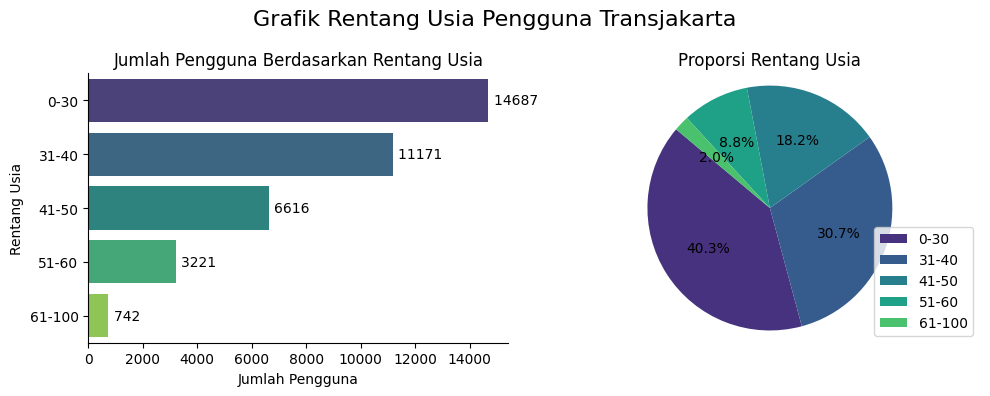

In [86]:
# Menampilkan grafik rentang usia pengguna transjakarta
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(y=counts.index, x=counts.values, ax=ax[0], palette='viridis', orient='h')
ax[0].set_xlabel('Jumlah Pengguna')
ax[0].set_title('Jumlah Pengguna Berdasarkan Rentang Usia')

ax[1].pie(counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
ax[1].set_title('Proporsi Rentang Usia')

ax[1].axis('equal')
ax[1].legend(counts.index, loc='lower right', bbox_to_anchor=(1.0, 0.0))

annotate_bars(ax[0])
despine(ax[0])
plt.suptitle('Grafik Rentang Usia Pengguna Transjakarta', fontsize=16)
plt.tight_layout()
plt.show()

Dari grafik rentang usia pengguna transjakarta kita dapat melihat bahwa

- Pengguna transjakarta 40% berusia dibawah 30 tahun, hal ini menunjukkan bahwa pengguna transjakarta adalah kaum muda.
- Persentase gabungan yang cukup tinggi juga, sebesar lebih dari 20% merupakan pengguna transjakarta yang berada direntang usia 41-60, yang merupakan pengguna dengan rentang usia yang sebagian besar mungkin sudah memiliki pengalaman, posisi dan jabatan dari level menengah hingga top manajemen di tempat kerja. Hal ini menunjukan transjakarta masih cukup menarik sebagai pilihan masyarakat Jakarta pada usia-usia tersebut sebagai transportasi untuk bepergian ke tempat kerja. Meskipun pengguna pada posisi tinggi di perusahaan memiliki kemampuan untuk membawa kendaraan sendiri.
- Dan terdapat 2% pengguna transjakarta yang merupakan lansia, hal ini perlu menjadi perhatian bagi transjakarta untuk memastikan fasilitas khusus yang diperlukan bagi lansia.

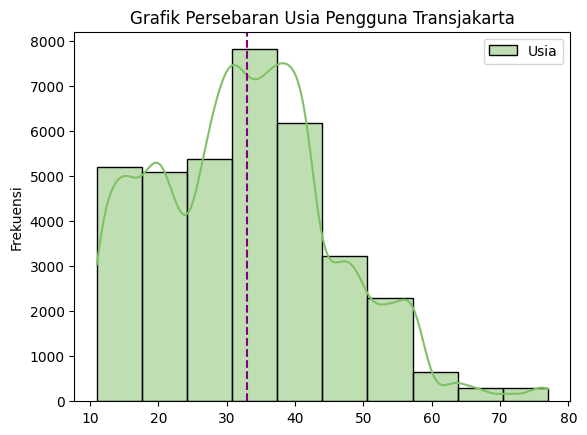

In [41]:
# Menampilkan grafik persebaran usia 
sns.histplot(df, bins=10, kde=True, palette='summer', edgecolor='black')
plt.axvline(df['Usia'].median(), color='purple', linestyle='--')
plt.ylabel('Frekuensi')
plt.title('Grafik Persebaran Usia Pengguna Transjakarta')
plt.show()

Jika kita melihat dari grafik persebaran usia, dapat terlihat bahwa kebanyakan data berada dibawah dari data mediannya, dengan median datanya 31.

#### `Analisis Gender` 

In [42]:
df2 = transjakarta['payCardSex'].value_counts()
df2

payCardSex
F    19406
M    17031
Name: count, dtype: int64

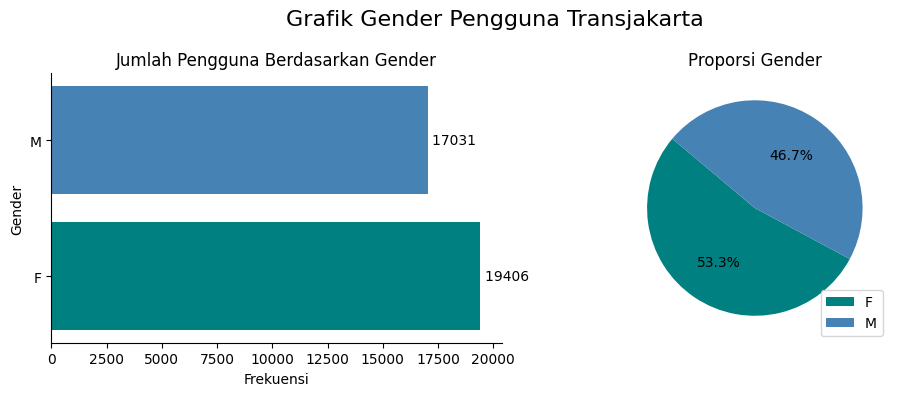

In [43]:
# Menampilkan grafik gender
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].barh(df2.index, df2.values, color=['teal', 'steelblue'])
ax[0].set_ylabel('Gender')
ax[0].set_xlabel('Frekuensi')
ax[0].set_title('Jumlah Pengguna Berdasarkan Gender')

ax[1].pie(df2, autopct='%1.1f%%', startangle=140, colors=['teal', 'steelblue'])
ax[1].legend(df2.index, loc='lower right', bbox_to_anchor=(1.0, 0.0))
ax[1].set_title('Proporsi Gender')

plt.suptitle('Grafik Gender Pengguna Transjakarta', fontsize=16)
annotate_bars(ax[0])
despine(ax[0])
plt.tight_layout()
plt.show()

Dari grafik gender pengguna transjakarta dapat terlihat bahwa lebih dari setengah pengguna transjakarta adalah perempuan. Hal ini dikarenakan sebagian pengguna perempuan mungkin lebih nyaman bepergian dengan kendaraan umum dibandingkan harus membawa kendaraan sendiri, ditambah lagi dengan kondisi jalanan Jakarta yang sudah cukup padat dan berpolusi, membuat transjakarta menjadi pilihan yang menarik bagi pengguna perempuan. Data ini diharapkan menjadi perhatian bagi transjakarta dalam memenuhi pelayanan dan fasilitas transjakarta yang ramah bagi perempuan. Transportasi publik diharapkan dapat menyediakan tempat bagi pengguna perempuan yang aman dan nyaman.

#### `Analisis Media Pembayaran`

In [44]:
# Mengelompokkan pengguna berdasarkan media pembayaran
mp = transjakarta.groupby('payCardBank')['payCardName'].count()
mp1 = mp.sort_values(ascending=False)

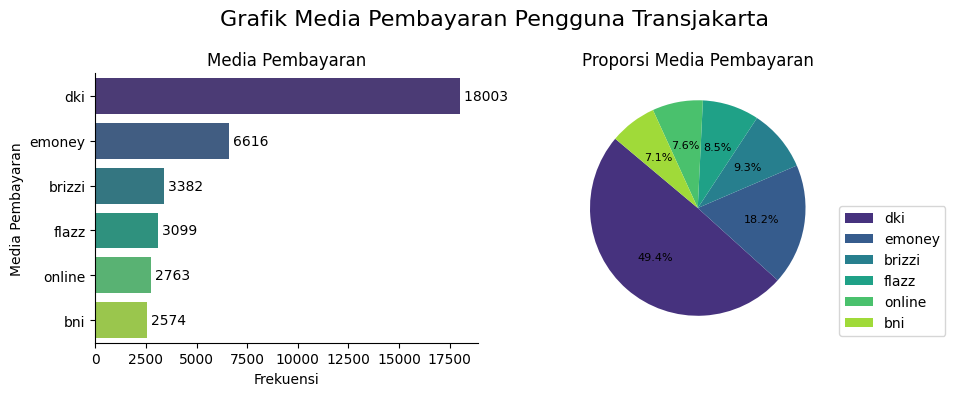

In [84]:
# Menampilkan grafik media pembayaran
fig, ax = plt.subplots(1,2,figsize=(10,4))

sns.barplot(y=mp1.index, x=mp1.values, ax=ax[0], palette='viridis', orient='h')
ax[0].set_ylabel('Media Pembayaran')
ax[0].set_xlabel('Frekuensi')
ax[0].set_title('Media Pembayaran')

wedges, texts, autotexts = ax[1].pie(
    mp1, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis')
)

for autotext in autotexts:
    autotext.set_fontsize(8)

ax[1].legend(mp1.index, loc='lower left', bbox_to_anchor=(1.0, 0.0))
ax[1].set_title('Proporsi Media Pembayaran')

plt.suptitle('Grafik Media Pembayaran Pengguna Transjakarta', fontsize=16)
annotate_bars(ax[0])
despine(ax[0])
plt.tight_layout()
plt.show()

Pada grafik media pembayaran pengguna transjakarta, hampir setengahnya menggunakan kartu bank dki, kemudian kartu terbanyak yang digunakan selanjutnya diikuti oleh emoney dari bank mandiri dan brizzi dari bank bri. Hal ini terjadi karena pemerintah mendorong masyarakat Jakarta untuk menggunakan kartu bank dki dalam transaksi elektronik untuk naik kendaraan umum. Disamping itu, terdapat beberapa masyarakat yang diberikan fasilitas gratis naik transjakarta dengan menggunakan kartu bank dki, diantaranya lansia, penyandang disabilitas, veteran, penerima raskin.

#### `Analisis Jumlah Pembayaran`

2728.4079369871283


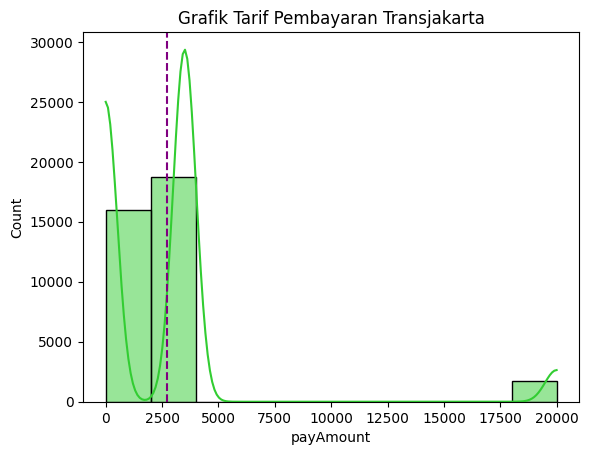

In [46]:
# Menampilkan grafik tarif pembayaran
sns.histplot(data=transjakarta['payAmount'], kde=True, bins=10, color='limegreen')
print(transjakarta['payAmount'].mean())
plt.axvline(transjakarta['payAmount'].mean(), color='purple', linestyle='--')
plt.title('Grafik Tarif Pembayaran Transjakarta')
plt.show()

Dari grafik tarif pembayaran pengguna transjakarta, terlihat bahwa data hanya memiliki 3 nilai unik, yaitu 0, 3500, dan 20000. Tarif standar yang berlaku adalah 3500, sedangkan tarif 0 merupakan tarif pengguna transjakarta yang diberikan fasilitas gratis oleh pemerintah, sedangkan tarif 20000, merupakan tarif bagi pengguna yang menggunakan royal trans yang merupakan bus transjakarta dengan fasilitas mewah.

### Analisis Waktu-Waktu Sibuk Transjakarta

#### `Hari Sibuk`

In [47]:
# Menambahkan kolom hari 
transjakarta['Hari'] = transjakarta['tapInTime'].dt.day_name()

In [48]:
# Merubah nama hari
transjakarta['Hari'] = transjakarta['Hari'].map({
    'Monday':'Senin',
    'Tuesday':'Selasa',
    'Wednesday':'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
})

In [49]:
# Menampilkan kolom hari
transjakarta['Hari']

0         Senin
1         Senin
2         Senin
3         Senin
4         Senin
          ...  
37895     Jumat
37896    Selasa
37897    Selasa
37898     Sabtu
37899      Rabu
Name: Hari, Length: 36437, dtype: object

In [50]:
# Menampilkan jumlah penumpang harian
penumpang_harian = transjakarta.groupby('Hari').agg({
    'transID': 'count'
}).sort_values('transID', ascending=False)
penumpang_harian

,transID
Hari,
Jumat,6613
Senin,6604
Selasa,6591
Kamis,6573
Rabu,6565
Minggu,1752
Sabtu,1739


In [51]:
# Menambahkan anotasi pada grafik
def annotate_bars_h(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width() - 0.1,
            y + bar.get_height() + 300, 
            f'{bar.get_height():.0f} ',
            va='top', 
            ha='right', 
            color='black'
        )
    return ax

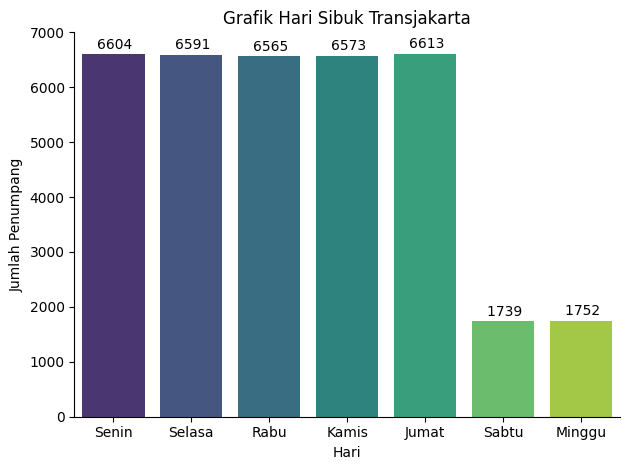

In [52]:
# Menampilkan grafik hari sibuk transjakarta
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
ax1 = sns.barplot(data=penumpang_harian, y='transID', x='Hari', palette='viridis', order=urutan_hari)
plt.yticks(ticks=range(0,7001,1000))
plt.ylabel('Jumlah Penumpang')
annotate_bars_h(ax1)
despine(ax1)
plt.title('Grafik Hari Sibuk Transjakarta')
plt.tight_layout();

Dari grafik hari sibuk transjakarta, kita dapat melihat bahwa transjakarta mengalami kepadatan penumpang pada hari-hari bekerja atau weekday, sedangkan pada weekend jumlah penumpang lebih rendah dibandingkan weekday, hal ini terjadi karena pada hari libur pengguna transjakarta kebanyakan tidak berpergian, hanya sedikit saja dari pengguna transjakarta yang berpergian di hari weekend.

#### `Jam Sibuk`

In [53]:
# Konversi kolom Waktu Transaksi ke tipe data datetime
transjakarta['tapInTime'] = pd.to_datetime(transjakarta['tapInTime'])

# Ekstrak jam dari kolom tapInTime
transjakarta['Jam Transaksi'] = transjakarta['tapInTime'].dt.hour

# Menampilkan jam dengan jumlah transaksi 
df3 = transjakarta.groupby('Jam Transaksi')[['transID']].count().sort_values(by='transID', ascending=False).reset_index()
df3

,Jam Transaksi,transID
0,6,5618
1,17,5270
2,5,3234
3,16,3231
4,8,2778
5,9,2714
6,7,2694
7,19,2354
8,18,2332
9,20,2320


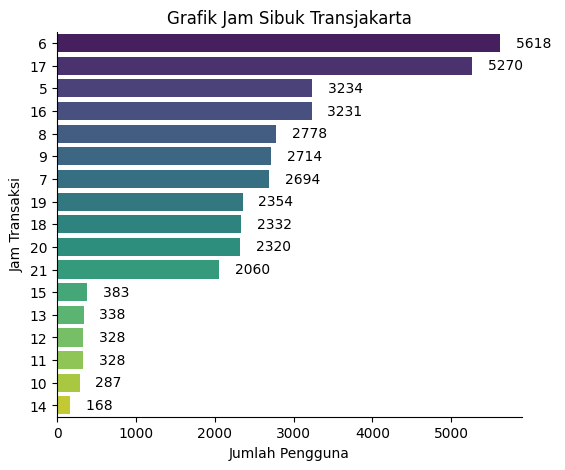

In [54]:
# Menampilkan grafik jam sibuk 
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(data=df3, y='Jam Transaksi', x='transID', palette='viridis', orient='h', order=df3['Jam Transaksi'])
plt.ylabel('Jam Transaksi')
plt.xlabel('Jumlah Pengguna')
annotate_bars(ax)
despine(ax)
plt.title('Grafik Jam Sibuk Transjakarta')
plt.show()

Pada grafik jam sibuk transjakarta, dapat terlihat bahwa jam operasional paling sibuk transjakarta adalah jam 6 dipagi hari dan jam 17 disore hari. Hal ini dikarenakan jam-jam tersebut merupakan jam pulang kantor. Untuk menanggulangi kepadatan penumpang pada jam sibuk, penambahan armada dapat dilakukan, dengan dikombinasikan dengan data koridor paling banyak penumpang, transjakarta dapat melakukan penambahan armada pada koridor-koridor tertentu dan jam-jam tertentu untuk meningkatkan pelayanan kepada pengguna transjakarta.

### Analisis Koridor Transjakarta

In [55]:
# Menampilkan jumlah pengguna berdasarkan koridor
transjakarta.groupby('corridorID')[['transID']].count().sort_values(by='transID', ascending=False)

,transID
corridorID,
1T,394
S21,384
JIS3,340
JAK.06,335
11P,329
...,...
JAK.53,38
JAK.99,30
JAK.12,22


In [56]:
# Menampilkan nama halte pada koridor terbanyak (1T)
transjakarta[transjakarta['corridorID']=='1T'][['corridorName','corridorID','tapInStopsName']]

,corridorName,corridorID,tapInStopsName
5,Cibubur - Balai Kota,1T,Benhil 3
134,Cibubur - Balai Kota,1T,Balai Kota 1
305,Cibubur - Balai Kota,1T,Dukuh Atas 3
370,Cibubur - Balai Kota,1T,Tosari 1
434,Cibubur - Balai Kota,1T,Cibubur Junction
...,...,...,...
33697,Cibubur - Balai Kota,1T,Grand Sahid
33908,Cibubur - Balai Kota,1T,Plaza Sentral
34354,Cibubur - Balai Kota,1T,Plaza Indonesia
34440,Cibubur - Balai Kota,1T,MH Thamrin 2


In [57]:
# Koordinat halte pada koridor terbanyak (1T)
lat_high = transjakarta[transjakarta['corridorID']=='1T']['tapInStopsLat']
long_high = transjakarta[transjakarta['corridorID']=='1T']['tapInStopsLon']

In [59]:
# Membaca file Shapefile koridor 
shapefile_path = r'C:\Users\RIDWAN\Documents\VS Code\Purwadhika\Capstone 2\transjakarta-data-analysis\Transjakarta.shp'
gdf = gpd.read_file(shapefile_path)

# Menyimpan sebagai GeoJSON
geojson_path = r'C:\Users\RIDWAN\Documents\VS Code\Purwadhika\Capstone 2\transjakarta-data-analysis\Transjakarta.geojson'
gdf.to_file(r'C:\Users\RIDWAN\Documents\VS Code\Purwadhika\Capstone 2\transjakarta-data-analysis\Transjakarta.geojson', driver='GeoJSON')


In [60]:
# Memuat GeoJSON ke dalam Peta Folium
with open(geojson_path) as f:
    geojson_data = json.load(f)

In [61]:
# Membuat peta awal
mymap_high = folium.Map(location=[-6.195590238576627, 106.82262945431557], zoom_start=13)

In [62]:
# Koridor paling banyak pengguna
for lat, long in list(zip(lat_high, long_high)):
    folium.Marker(location=(lat, long), icon=folium.Icon(icon='bus', prefix='fa'), popup='Koridor 1T').add_to(mymap_high)

# Menambahkan GeoJSON ke peta
folium.GeoJson(geojson_data).add_to(mymap_high)

mymap_high

Pada peta diatas dapat terlihat koridor yang paling banyak pengguna pada bis transjakarta. Dapat terlihat bahwa lokasi koridor tersebut berada di pusat Kota Jakarta, yang juga merupakan kawasan dengan banyaknya area perkantoran disekitarnya. Pada saat jam sibuk transjakarta akan mengalami lonjakan penumpang yang sangat tinggi. Maka dari itu penambahan armada bus sangat diperlukan agar dapat lebih banyak menampung semua penumpang transjakarta pada saat jam sibuk. 

Demi keamanan dan kenyamanan pengguna transjakarta, halte-halte transjakarta juga sebaiknya dibuat lebih besar dan menyediakan tempat bagi pengguna perempuan, agar pengguna perempuan merasa nyaman dan aman dalam menggunakan transjakarta.

In [63]:
# Koordinat pada koridor paling sedikit pengguna (7B)
lat_low = transjakarta[transjakarta['corridorID']=='7B']['tapInStopsLat']
long_low = transjakarta[transjakarta['corridorID']=='7B']['tapInStopsLon']

In [64]:
# Membuat peta awal
mymap_low = folium.Map(location=[-6.195590238576627, 106.82262945431557], zoom_start=12)

In [65]:
# Koridor paling sedikit pengguna
for lat, long in list(zip(lat_low, long_low)):
    folium.Marker(location=(lat, long), icon=folium.Icon(icon='bus', prefix='fa'), popup='Koridor 7B').add_to(mymap_low)

# Menambahkan GeoJSON ke peta
folium.GeoJson(geojson_data).add_to(mymap_low)

mymap_low

Pada koridor dengan pengguna transjakarta paling sedikit, berada pada koridor 7B, hal ini menunjukkan bahwa sedikitnya area perkantoran pada area ini, transjakarta sebaiknya dapat menyesuaikan armada bus yang dioperasikan pada koridor-koridor yang paling sedikit, agar efisien dalam operasional, bus transjakarta dapat menyesuaikan armada dengan jumlah pengguna harian.

Terdapat koridor dengan pengguna yang paling sedikit selain koridor 7B, yaitu koridor M5, namun koridor M5 merupakan koridor yang hanya beroperasi malam hari, sehingga wajar apabila penggunanya sangat sedikit. 

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut

- Transjakarta dilihat dari karakteristik penggunanya kebanyakan adalah perempuan, dan jika dilihat dari rentang usia, 40% penggunanya masih dibawah 30 tahun, 20% pengguna berada pada rentang usia 41-60 dan juga terdapat pengguna lansia. 
- Jam-jam sibuk transjakarta terjadi pada jam 6 dipagi hari dan jam 17 disore hari, dan hari sibuk transjakarta terjadi pada weekday.
- Koridor transjakarta yang memiliki pengguna terbanyak berada di koridor 1T, dan koridor dengan pengguna paling sedikit adalah 7B.

Dari kesimpulan tersebut, kita dapat merekomendasikan beberapa hal sebagai berikut

- Transjakarta sebaiknya menyediakan bus dan halte yang terpisah antara laki-laki dan perempuan demi kenyamanan dan keamanan pengguna perempuan, fasilitas bagi pengguna lansia juga dapat disesuaikan. 
- Pada koridor-koridor yang memiliki pengguna paling banyak beserta koridor-koridor lain yang padat penumpang, penambahan armada pada koridor-koridor tersebut dan pada jam-jam sibuk dapat dilakukan untuk menanggulangi kepadatan penumpang, penambahan armada dapat menyesuaikan dengan jumlah pengguna harian.
- Pada koridor-koridor yang memiliki pengguna paling sedikit penyediaan armada bus dapat disesuaikan dengan jumlah pengguna harian untuk efisiensi dalam operasional transjakarta.
- Armada bus transjakarta pada waktu weekend pun dapat disesuaikan dengan jumlah pengguna pada waktu weekend demi efisiensi operasional transjakarta.
- Untuk meningkatkan inovasi dalam pelayanan dan kenyamanan transjakarta dan peningkatan pendapatan transjakarta, pemasaran penggunaan bus royal trans dapat lebih digencarkan kepada masyarakat Jakarta, terutama untuk mengincar pengguna dengan rentang usia 41-60 tahun, tawarkan beberapa pilihan diskon pada waktu-waktu tertentu untuk menarik minat masyarakat mencoba pengalaman menaiki bus royal trans yang diharapkan menjadi pengguna tetap dari bus royal trans sebagai pilihan angkutan umum yang lebih nyaman dan premium.
- Armada bus royal trans juga dapat dioperasionalkan pada waktu weekend untuk mengakomodasi pengguna transjakarta yang ingin berpergian pada waktu weekend untuk berlibur.